# Stock Market Clustering with a KMeans algorithm
> In this project, it will show the clustering algorithm to detect similar companies based on stock market movement. The original data is from Yahoo Finance.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Machine_Learning]
- image: images/kmeans_stock_cluster.png

## Required Packages

In [4]:
import sys
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data
import sklearn

plt.rcParams['figure.figsize'] = (8, 8)

## Version check

In [5]:
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.18.1
Matplotlib: 3.1.3
Seaborn: 0.10.0
Pandas: 1.0.1
Scikit-learn: 0.22.1


## Prepare dataset

In [35]:
# Define the instruments to download
companies_dict = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds': 'MCD',
    'Intel': 'INTC',
    'Navistar': 'NAV',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electrics': 'GE',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Mistubishi': 'MSBHY',
    'Sony': 'SNE',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC',
}

In [36]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mistubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [107]:
companies_sorted = [x[1] for x in companies]
companies_sorted

['AAPL',
 'AMZN',
 'AXP',
 'BA',
 'BAC',
 'CVX',
 'F',
 'GE',
 'HMC',
 'IBM',
 'INTC',
 'JNJ',
 'KO',
 'LMT',
 'MA',
 'MCD',
 'MSBHY',
 'MSFT',
 'NAV',
 'NOC',
 'PEP',
 'SNE',
 'TM',
 'TXN',
 'VLO',
 'WBA',
 'XOM']

In [108]:
# Define which online source to use
data_source = 'yahoo'

# Define the start and end dates
start_date = '2015-01-01'
end_date = '2017-12-31'

#  Use pandas_reader.data.DataReader to load the desired stock data
panel_data = data.DataReader(companies_sorted, data_source, start_date, end_date).unstack().unstack().T

# Print Axes labels
print(panel_data.axes)

[DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None), MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'BAC'),
            ('Adj Close',  'CVX'),
            ('Adj Close',    'F'),
            ('Adj Close',   'GE'),
            ('Adj Close',  'HMC'),
            ('Adj Close',  'IBM'),
            ...
            (   'Volume', 'MSFT'),
            (   'Volume',  'NAV'),
            (   'Volume',  'NOC'),
            (   'Volume',  'PEP'),
            (   'Volume',  '

In [109]:
# Find stock open and close data values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AAPL     110.379997
AMZN     310.350006
AXP       93.040001
BA       129.979996
BAC       17.889999
CVX      112.180000
F         15.500000
GE        24.298077
HMC       29.520000
IBM      160.440002
INTC      36.290001
JNJ      104.570000
KO        42.220001
LMT      192.570007
MA        86.160004
MCD       93.699997
MSBHY     36.759998
MSFT      46.450001
NAV       33.480000
NOC      147.389999
PEP       94.559998
SNE       20.469999
TM       125.480003
TXN       53.470001
VLO       49.500000
WBA       76.199997
XOM       92.449997
Name: 2014-12-31 00:00:00, dtype: float64


In [110]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape
print(row, col)

movements = np.zeros([row, col])

for i in range(0, row):
    movements[i, :] = np.subtract(stock_close[i, :], stock_open[i, :])
    
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i, :])))

27 756
Company: Apple, Change: 14.249893188476562
Company: Amazon, Change: -83.93020629882812
Company: American Express, Change: 5.600105285644531
Company: Boeing, Change: 100.44984436035156
Company: Bank of America, Change: -3.780003547668457
Company: Chevron, Change: 27.099990844726562
Company: Ford, Change: -5.559996604919434
Company: General Electrics, Change: 4.509649276733398
Company: Honda, Change: -8.180000305175781
Company: IBM, Change: 15.669967651367188
Company: Intel, Change: 19.52003288269043
Company: Johnson & Johnson, Change: 30.619949340820312
Company: Coca Cola, Change: 11.459976196289062
Company: Lockheed Martin, Change: 57.899932861328125
Company: MasterCard, Change: 23.569869995117188
Company: McDonalds, Change: 51.290016174316406
Company: Mistubishi, Change: 30.440019607543945
Company: Microsoft, Change: 28.480026245117188
Company: Navistar, Change: -0.6599926948547363
Company: Northrop Grumman, Change: 72.03007507324219
Company: Pepsi, Change: 36.96997833251953
Co

## Visualization

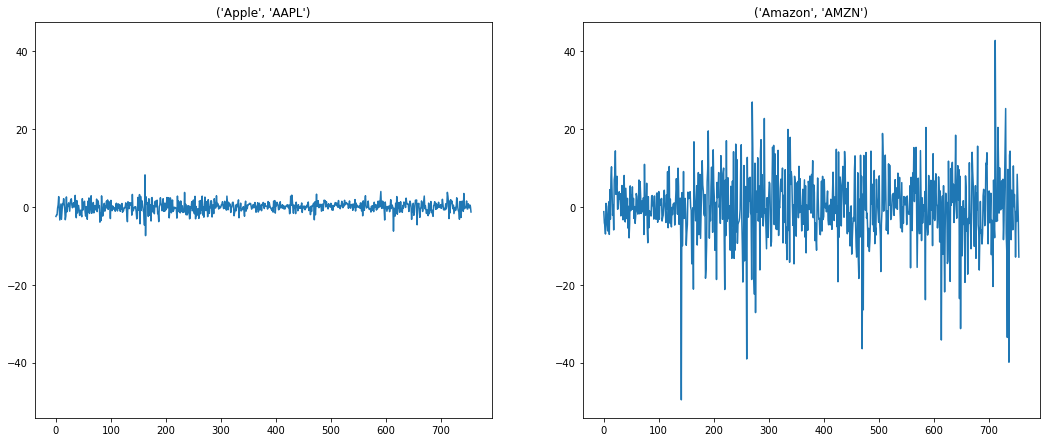

In [111]:
# Plot Stock Movements
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:]);
plt.title(companies[0]);

ax2 = plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:]);
plt.title(companies[1]);

## Preprocessing dataset

In [112]:
from sklearn.preprocessing import Normalizer

# Create the normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.26029795916062815
-0.259844372052625
0.0010042172886527312


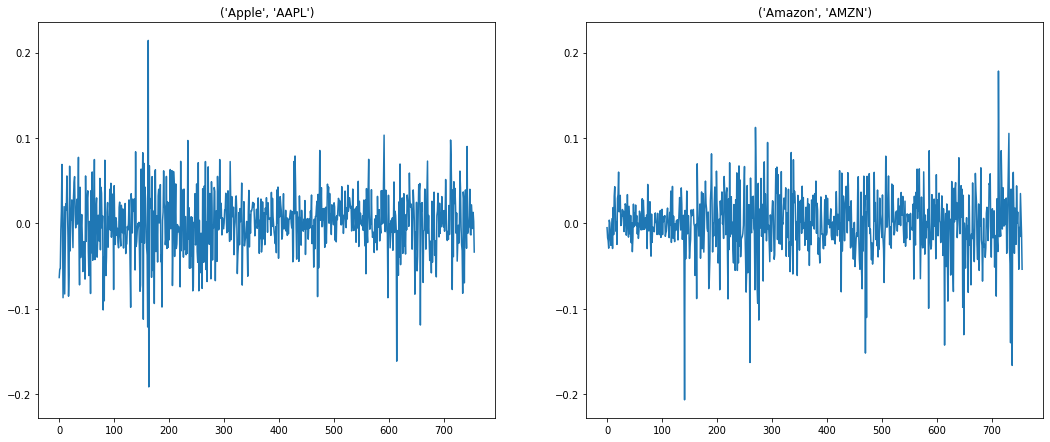

In [113]:
# Plot Stock Movements
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[0][:]);
plt.title(companies[0]);

ax2 = plt.subplot(222, sharey=ax1)
plt.plot(new[1][:]);
plt.title(companies[1]);

## Build Pipeline

In [126]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Define normalizer
normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [127]:
# Fit pipeline to dail stock movements
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [128]:
print(kmeans.inertia_)

9.092805468381199


## Clustering

In [129]:
# Predict the cluster labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels':labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
26       0              (Exxon, XOM)
5        0            (Chevron, CVX)
23       1  (Texas Instruments, TXN)
10       1             (Intel, INTC)
9        1                (IBM, IBM)
0        1             (Apple, AAPL)
6        2                 (Ford, F)
7        2   (General Electrics, GE)
8        2              (Honda, HMC)
2        2   (American Express, AXP)
24       2      (Valero Energy, VLO)
4        2    (Bank of America, BAC)
22       2              (Toyota, TM)
21       2               (Sony, SNE)
11       3  (Johnson & Johnson, JNJ)
12       3           (Coca Cola, KO)
20       3              (Pepsi, PEP)
3        4              (Boeing, BA)
14       5          (MasterCard, MA)
15       5          (McDonalds, MCD)
17       5         (Microsoft, MSFT)
1        5            (Amazon, AMZN)
13       6    (Lockheed Martin, LMT)
19       6   (Northrop Grumman, NOC)
18       7           (Navistar, NAV)
25       8           (Walgreen, WBA)
1

## Dimensionality Reduction with PCA

In [136]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(new)

# Run kmeans on the reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

print(kmeans.inertia_)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels':labels, 'companies':companies})
print(df.sort_values('labels'))

0.11095173200568617
    labels                 companies
7        0   (General Electrics, GE)
15       1          (McDonalds, MCD)
2        2   (American Express, AXP)
24       2      (Valero Energy, VLO)
22       2              (Toyota, TM)
8        2              (Honda, HMC)
0        3             (Apple, AAPL)
1        3            (Amazon, AMZN)
23       3  (Texas Instruments, TXN)
17       3         (Microsoft, MSFT)
14       3          (MasterCard, MA)
20       4              (Pepsi, PEP)
19       4   (Northrop Grumman, NOC)
13       4    (Lockheed Martin, LMT)
12       4           (Coca Cola, KO)
11       4  (Johnson & Johnson, JNJ)
5        5            (Chevron, CVX)
26       5              (Exxon, XOM)
18       6           (Navistar, NAV)
6        6                 (Ford, F)
4        6    (Bank of America, BAC)
10       7             (Intel, INTC)
21       7               (Sony, SNE)
3        8              (Boeing, BA)
25       8           (Walgreen, WBA)
16       9       (

## Visualize cluster

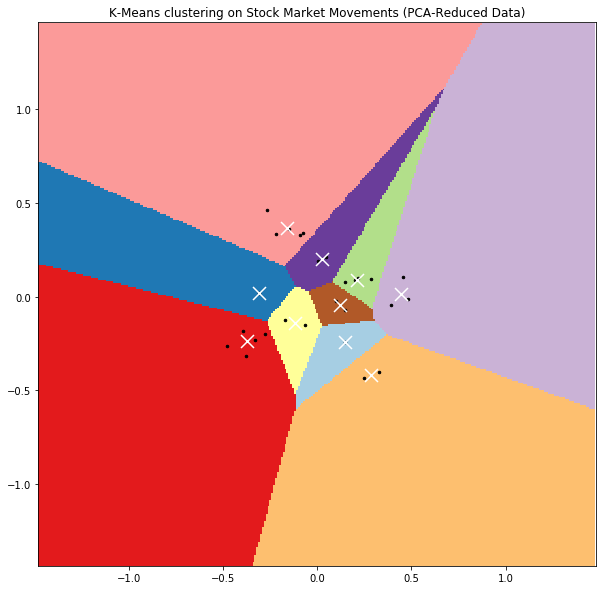

In [138]:
# Define step size of mesh
h = 0.01

# Plot the decision boundary (+- 1 for padding)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define colorplot
cmap = plt.cm.Paired

# Plot figure
plt.figure(figsize=(10, 10))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = cmap, aspect='auto', origin='lower');
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5);

# Plot the centroids of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10);
plt.title('K-Means clustering on Stock Market Movements (PCA-Reduced Data)');
plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);